In [51]:
# https://machinelearningmastery.com/gradient-descent-for-machine-learning/

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
import seaborn as sns

In [55]:
X,y,cof = make_regression(n_samples=500,n_features=1,bias=4.2,noise=7.1,coef=True)
print(X.shape,y.shape,cof)

(500, 1) (500,) 28.130498557718198


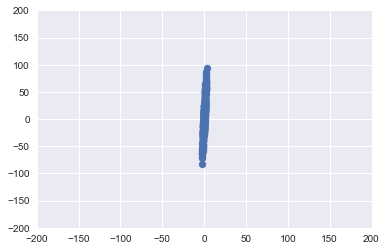

In [59]:
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.scatter(X[:, 0], y)
# sns.plt.scatter(X[:, 0], y)

In [61]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(400, 1) (100, 1)
(400,) (100,)


In [62]:
# hypothesis function
def hypothesis(x,w):
    return x*w[1]+w[0]
#error computer
def get_error(y_true,x,w): # y_true is the actual points (y-coordinate only)
    err = 0.0
    # get number of examples
    m = x.shape[0]
    for ix in range(m):
        # for each example compute the square error
        err += (y_true[ix] - hypothesis(x[ix], w))**2
    
    err /= (2*m)
    return err

# error gradient
def get_grads(y_true, x, w):
    
    grad_00 = 0.0
    grad_01 = 0.0
    # Get number of examples
    m = x.shape[0]
    
    for ix in range(m):
        # for each example compute the gradients
        grad_00 += (y_true[ix] - hypothesis(x[ix], w))*(-1)
        grad_01 += (y_true[ix] - hypothesis(x[ix], w))*(-1*x[ix])
    
    # Get mean grads
    grad_00 = grad_00 / m
    grad_01 = grad_01 / m
    return [grad_00, grad_01]

# update weights using grad. desc.
def grad_descent(x, y_true, w, learning_rate=0.1):
    error = get_error(y_true, x, w)
    [grad_00, grad_01] = get_grads(y_true, x, w)
    
    w[0] = w[0] - learning_rate*grad_00
    w[1] = w[1] - learning_rate*grad_01
    
    return error, w

In [63]:
W = np.array([0.1, 0.1])
loss = []

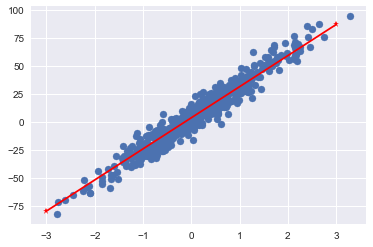

In [105]:
# for ix in range(100):

plt.scatter(X[:, 0], y)

y_0 = hypothesis(-3, W)
y_1 = hypothesis(3, W)

plt.plot([-3, 3], [y_0, y_1], 'r*-')
plt.show()

l, W = grad_descent(X_train, y_train, W, learning_rate=0.1)
loss.append(l)

# print loss

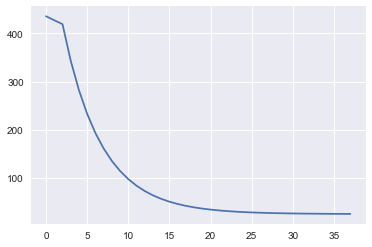

In [106]:
plt.plot(loss)
plt.show()

In [108]:
print (W)

[ 3.59159082 27.84160023]


In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lr = LinearRegression()

lr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
lr.score(X_test, y_test)

0.9465562654981454